# **word n grame**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools


In [3]:

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [4]:
# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

In [12]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Define the evaluation metric (accuracy)
scorer = make_scorer(accuracy_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer, cv=5, verbose=2)

# Perform Grid Search to find the best parameters
grid_search.fit(X_tfidf, labels)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.3s
[CV] END m


Fold 1
Accuracy: 0.7261829652996845
Precision: 0.7221455100298904
Recall: 0.7180954322209927
F1 Score: 0.7194804665198598
Confusion Matrix:
[[453 240]
 [194 698]]


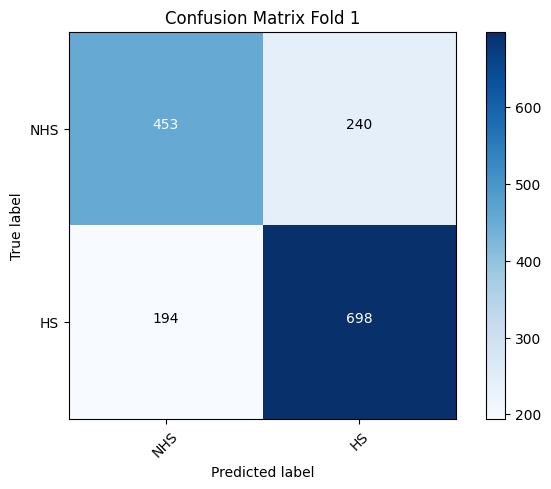


Fold 2
Accuracy: 0.7255520504731862
Precision: 0.729249071610489
Recall: 0.7085209882295085
F1 Score: 0.7109712096765066
Confusion Matrix:
[[397 296]
 [139 753]]


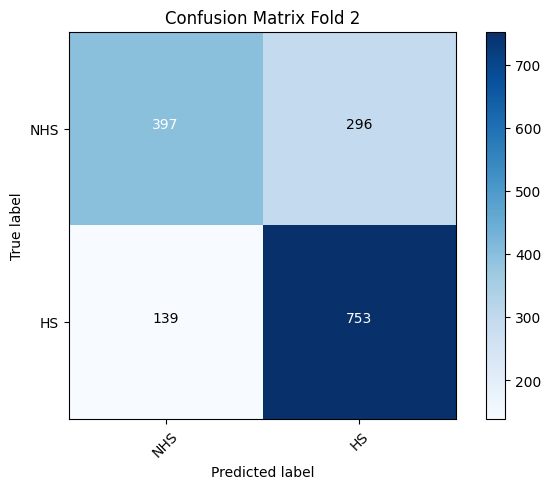


Fold 3
Accuracy: 0.7291666666666666
Precision: 0.7275078524086374
Recall: 0.7172518839185505
F1 Score: 0.7195716255359117
Confusion Matrix:
[[431 262]
 [167 724]]


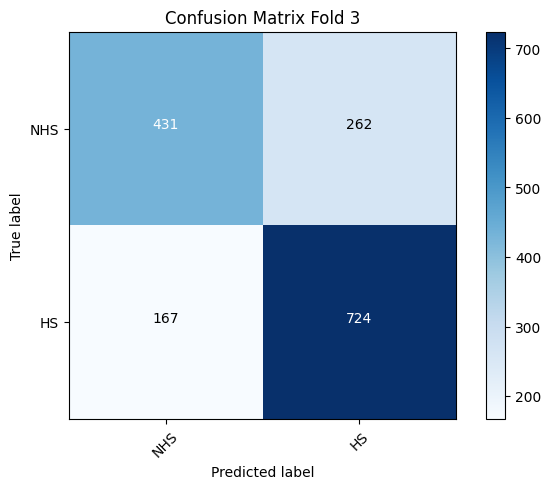


Fold 4
Accuracy: 0.7272727272727273
Precision: 0.7241420203339552
Recall: 0.717332050665384
F1 Score: 0.71923559185174
Confusion Matrix:
[[442 251]
 [181 710]]


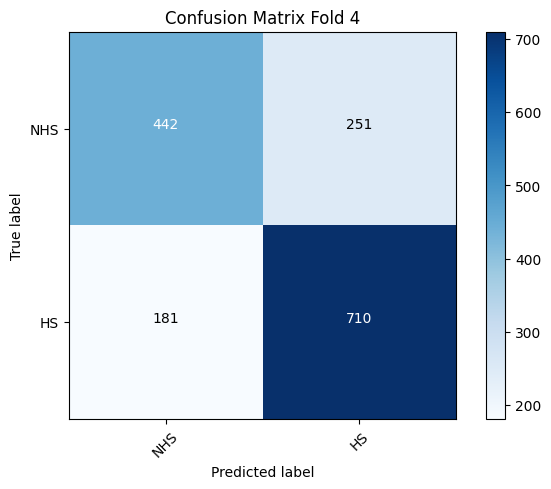


Fold 5
Accuracy: 0.7348484848484849
Precision: 0.7327195993964707
Recall: 0.7240660573993907
F1 Score: 0.7262961110087154
Confusion Matrix:
[[442 251]
 [169 722]]


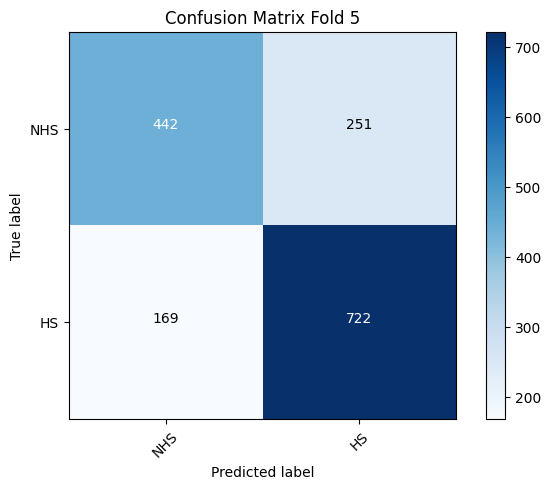


Mean Metrics Across All Folds:
Mean Accuracy: 0.7286045789121499
Mean Precision: 0.7271528107558887
Mean Recall: 0.7170532824867653
Mean F1 Score: 0.7191110009185466

Aggregated Confusion Matrix:
[[2165 1300]
 [ 850 3607]]


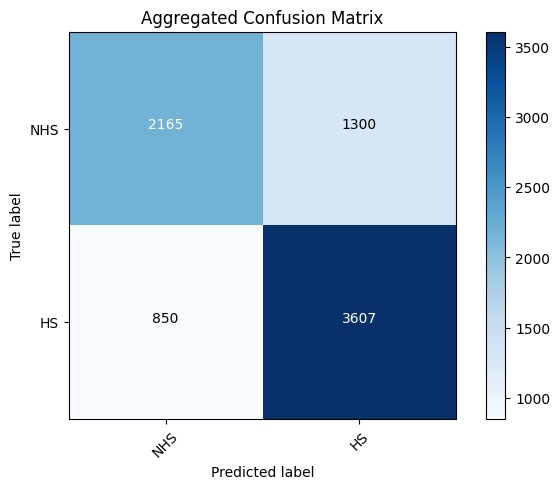

In [14]:
# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

    # Initialize and train the RandomForestClassifier model
    rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = rf_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


# **char ngrame **


Fold 1
Accuracy: 0.738801261829653
Precision: 0.741248121297081
Recall: 0.7238334659859323
F1 Score: 0.7267396149476791
Confusion Matrix:
[[419 274]
 [140 752]]


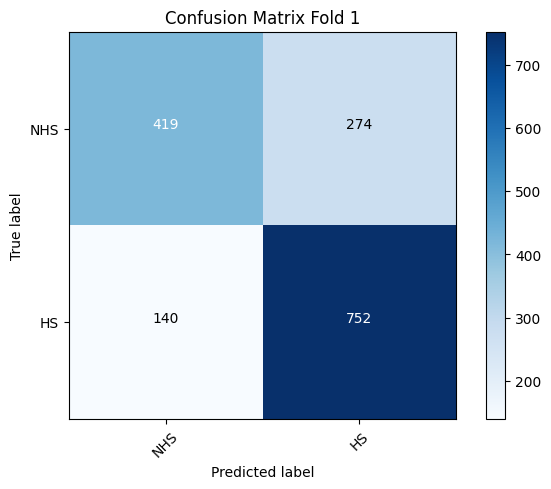


Fold 2
Accuracy: 0.7602523659305994
Precision: 0.7621716233174016
Recall: 0.7473987148875041
F1 Score: 0.7506524518278587
Confusion Matrix:
[[447 246]
 [134 758]]


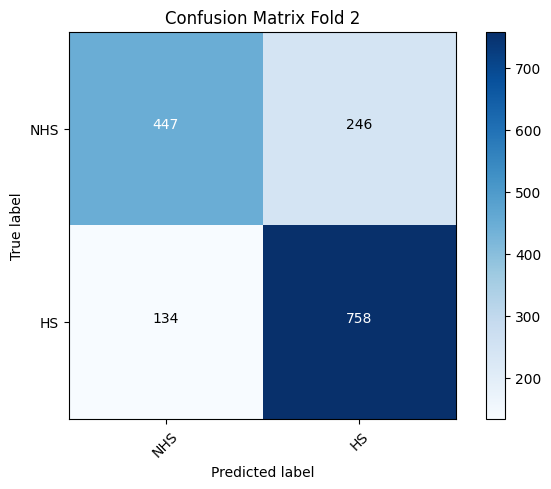


Fold 3
Accuracy: 0.7544191919191919
Precision: 0.7571005917159763
Recall: 0.7406605739939074
F1 Score: 0.7439018459984663
Confusion Matrix:
[[437 256]
 [133 758]]


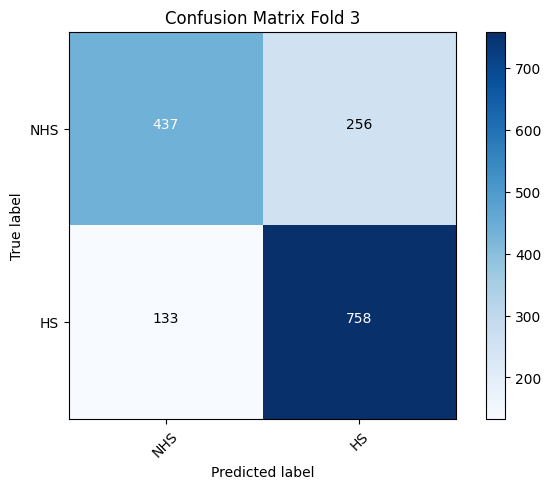


Fold 4
Accuracy: 0.7228535353535354
Precision: 0.7221876354330763
Recall: 0.7092352092352092
F1 Score: 0.7115923232965049
Confusion Matrix:
[[416 277]
 [162 729]]


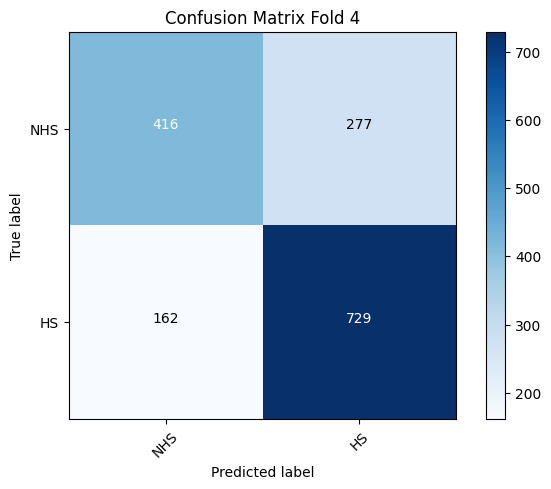


Fold 5
Accuracy: 0.7619949494949495
Precision: 0.763173959008287
Recall: 0.7499599166265833
F1 Score: 0.7530787217459081
Confusion Matrix:
[[453 240]
 [137 754]]


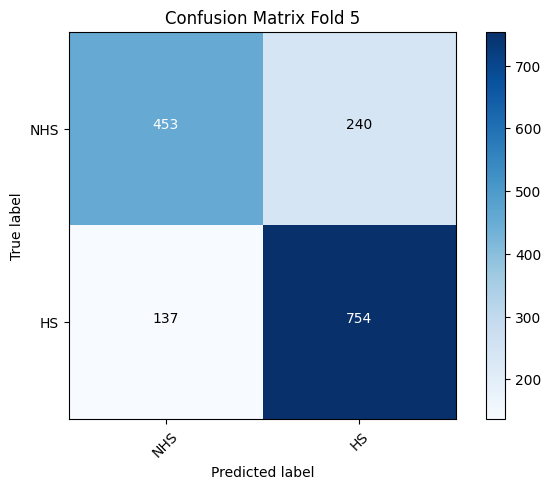


Mean Metrics Across All Folds:
Mean Accuracy: 0.7476642609055858
Mean Precision: 0.7491763861543645
Mean Recall: 0.7342175761458272
Mean F1 Score: 0.7371929915632833

Aggregated Confusion Matrix:
[[2172 1293]
 [ 706 3751]]


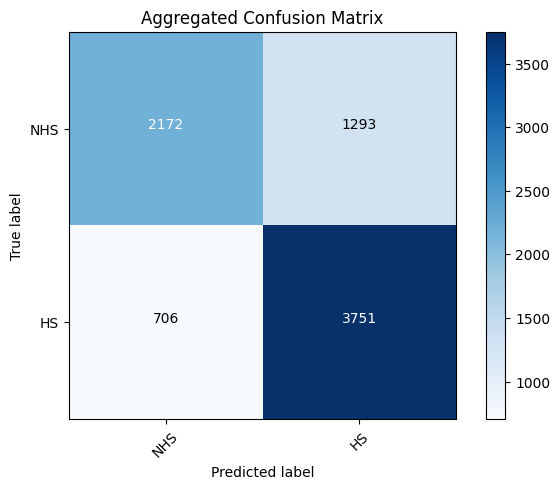

In [15]:
# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data using Character N-grams
tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(2, 6))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)


# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the RandomForestClassifier model
    rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = rf_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


**word/char n grame**


Fold 1
Accuracy: 0.7425867507886436
Precision: 0.7465767875603941
Recall: 0.7268747694756663
F1 Score: 0.729939663639826
Confusion Matrix:
[[417 276]
 [132 760]]


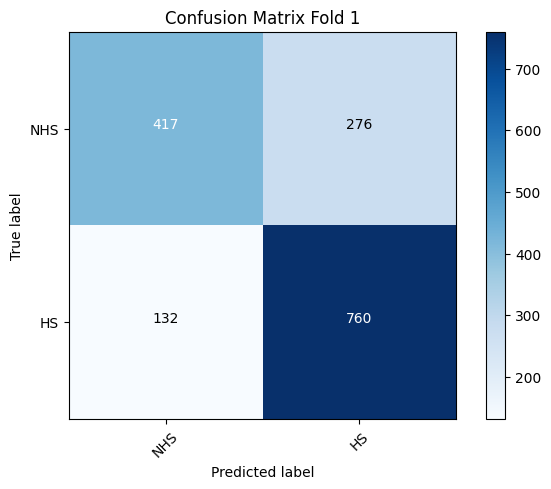


Fold 2
Accuracy: 0.7514195583596215
Precision: 0.7526614711549671
Recall: 0.7384244430208555
F1 Score: 0.7414659632109903
Confusion Matrix:
[[440 253]
 [141 751]]


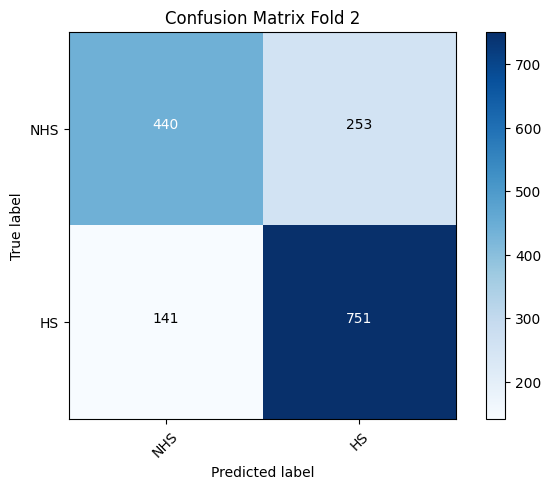


Fold 3
Accuracy: 0.7436868686868687
Precision: 0.74598035554552
Recall: 0.729357062690396
F1 Score: 0.7323500278843673
Confusion Matrix:
[[426 267]
 [139 752]]


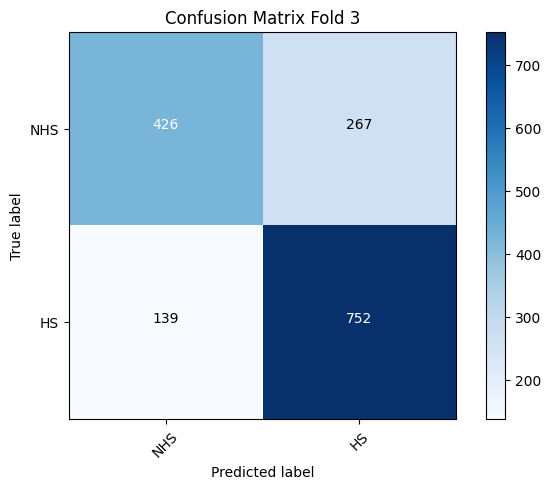


Fold 4
Accuracy: 0.7272727272727273
Precision: 0.7275505987832434
Recall: 0.7131633798300465
F1 Score: 0.7156685458993725
Confusion Matrix:
[[416 277]
 [155 736]]


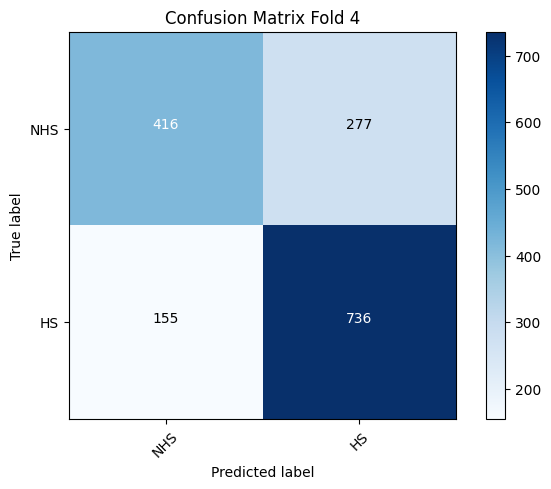


Fold 5
Accuracy: 0.7575757575757576
Precision: 0.7585414338244704
Recall: 0.7453904120570787
F1 Score: 0.7484312522023681
Confusion Matrix:
[[449 244]
 [140 751]]


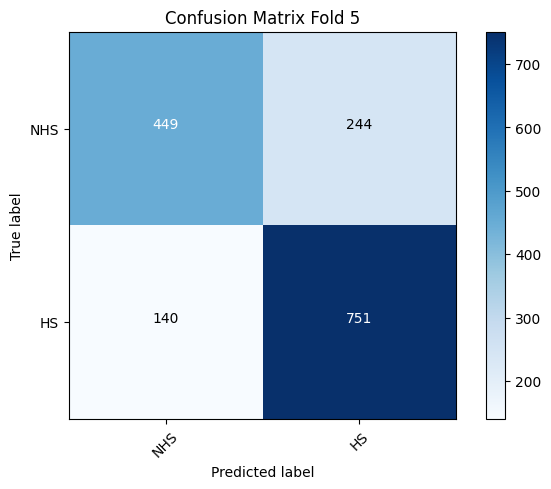


Mean Metrics Across All Folds:
Mean Accuracy: 0.7445083325367238
Mean Precision: 0.7462621293737189
Mean Recall: 0.7306420134148086
Mean F1 Score: 0.7335710905673848

Aggregated Confusion Matrix:
[[2148 1317]
 [ 707 3750]]


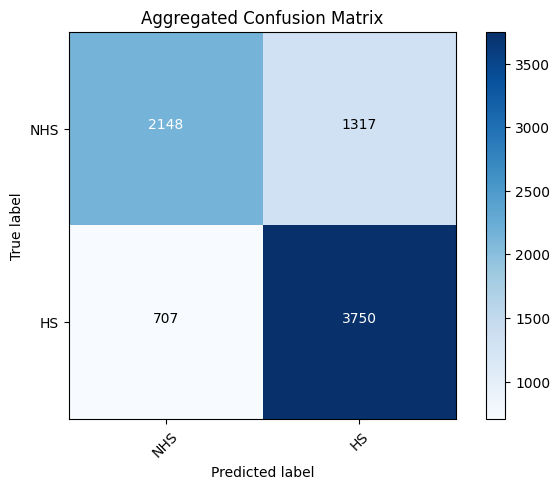

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools
from scipy.sparse import hstack

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Corrected column name space
tweets = df['Tweet'].values

# Initialize TfidfVectorizer for Word N-grams and Character N-grams
word_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
char_vectorizer = TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 6))

# Fit and transform the tweets using both vectorizers
X_word = word_vectorizer.fit_transform(tweets)
X_char = char_vectorizer.fit_transform(tweets)

# Combine the Word and Character N-grams features
X_combined = hstack([X_word, X_char])

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, labels)):
    print(f'\nFold {fold + 1}')

    # Split the combined features for training and validation
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the RandomForestClassifier model
    rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = rf_model.predict(X_val)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')
